# Keyword detection + analysis in reviews

In [110]:
# Imports
from keywordExtraction import KeyWordExtractor
from os import walk
import pandas as pd
import matplotlib.pyplot as plt

Fetching all datasets we have --- For now just using one: Edit this later

In [111]:
dataset_dir = "../review_dataset/"

files = []
set_paths = []
categories = []
for (dirpath, dirnames, filenames) in walk(dataset_dir):
    for file in filenames:
        set_paths.append(dirpath +"/"+ file)

print(set_paths)
print("\n----> TOTAL: ", len(set_paths), "sets")

['../review_dataset/Entertainment/max-stream-hbo-tv-movies.csv', '../review_dataset/Entertainment/Netflix.csv', '../review_dataset/Entertainment/ticketmaster-buy-sell-tickets.csv', '../review_dataset/Finance/cash-app.csv', '../review_dataset/Finance/paypal-send-shop-manage.csv', '../review_dataset/Finance/venmo.csv', '../review_dataset/Games/among-us.csv', '../review_dataset/Games/clash-of-clans.csv', '../review_dataset/Games/monopoly-go.csv', '../review_dataset/Health/bettersleep-relax-and-sleep.csv', '../review_dataset/Health/planet-fitness-workouts.csv', '../review_dataset/Health/yuka-foo-cosmetic-scanner.csv', '../review_dataset/Shopping/Amazon-shopping.csv', '../review_dataset/Shopping/etsy-home-style-gifts.csv', '../review_dataset/Shopping/walmart-shoping-savings.csv', '../review_dataset/Social_Media/facebook.csv', '../review_dataset/Social_Media/tiktok.csv', '../review_dataset/Social_Media/whatsapp-messenger.csv']

----> TOTAL:  18 sets


In [112]:
current_set = pd.read_csv(set_paths[6]) ## currently just using the first one

## Exploring the set -- and performing EDA + cleaning if any

In [113]:
current_set.head()

,Score,Date,Content,Title
0,4,2023-01-22 16:20:42,This is really fun I do not even hate it one b...,Fun!🌈💎✨❤️🌼🦄🧸🥰
1,5,2022-12-14 23:38:14,Hi! So I love the game! I love the detail ad...,Reasons of Among Us
2,5,2023-05-25 02:44:13,So I love among us but I have ideas for it so ...,Cool ideas for among us
3,3,2021-07-17 23:13:48,I used to bolt to my phone once I had the oppo...,The Updates
4,5,2023-07-16 17:06:38,Ok so I love this game soooooo much!!! but eve...,Awesome and really addicting


In [114]:
null_mask = current_set.isnull().any(axis=1)
null_rows = current_set[null_mask]
current_set = current_set[null_mask == False]
print("Rows with null values in any col:", len(null_rows))

### We have a clean dataset

Rows with null values in any col: 0


#### Getting summary stats -- and cleaning duplicates

In [115]:
print("TOTAL REVIWS:", current_set.count()["Content"])
print("UNIQUE REVIEWS:", len(current_set["Content"].unique()))
current_set = current_set[current_set["Content"].duplicated() == False]
print(current_set.dtypes)
current_set.head()

TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
Score       int64
Date       object
Content    object
Title      object
dtype: object


,Score,Date,Content,Title
0,4,2023-01-22 16:20:42,This is really fun I do not even hate it one b...,Fun!🌈💎✨❤️🌼🦄🧸🥰
1,5,2022-12-14 23:38:14,Hi! So I love the game! I love the detail ad...,Reasons of Among Us
2,5,2023-05-25 02:44:13,So I love among us but I have ideas for it so ...,Cool ideas for among us
3,3,2021-07-17 23:13:48,I used to bolt to my phone once I had the oppo...,The Updates
4,5,2023-07-16 17:06:38,Ok so I love this game soooooo much!!! but eve...,Awesome and really addicting


#### Cleaning review content + converting to datetime objects

In [116]:
current_set["Content"] = current_set["Content"].str.lower()
current_set["Content"] = current_set["Content"].str.strip()
current_set["Content"] = current_set["Content"].str.replace("’", "'")
current_set['Date'] = pd.to_datetime(current_set['Date'], format='%Y-%m-%d %H:%M:%S')
print("MAX DATE:", current_set['Date'].max())
print("MIN DATE:", current_set['Date'].min())
print(current_set.dtypes)
current_set

MAX DATE: 2023-11-11 19:58:40
MIN DATE: 2018-10-30 14:51:06
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object


,Score,Date,Content,Title
0,4,2023-01-22 16:20:42,this is really fun i do not even hate it one b...,Fun!🌈💎✨❤️🌼🦄🧸🥰
1,5,2022-12-14 23:38:14,hi! so i love the game! i love the detail ad...,Reasons of Among Us
2,5,2023-05-25 02:44:13,so i love among us but i have ideas for it so ...,Cool ideas for among us
3,3,2021-07-17 23:13:48,i used to bolt to my phone once i had the oppo...,The Updates
4,5,2023-07-16 17:06:38,ok so i love this game soooooo much!!! but eve...,Awesome and really addicting
...,...,...,...,...
9995,3,2020-12-25 02:22:21,i really enjoy playing among us! it's so creat...,Good but a few kinks
9996,5,2020-12-23 16:36:08,i love this game me and my brother like to pla...,New colors or modes
9997,5,2020-12-23 15:29:17,hi there who ever is reading this! i love this...,Amazing! But some problems.
9998,3,2020-12-23 14:52:20,hello i have had this game for about a month a...,Somethings I like and dislike


In [117]:
#### one function to clean df
def clean_dataset(df):
    null_mask = df.isnull().any(axis=1)
    null_rows = df[null_mask]
    df = df[null_mask == False]
    print("Rows with null values in any col:", len(null_rows))
    
    print("TOTAL REVIWS:", df.count()["Content"])
    print("UNIQUE REVIEWS:", len(df["Content"].unique()))
    df = df[df["Content"].duplicated() == False]

    df["Content"] = df["Content"].str.lower()
    df["Content"] = df["Content"].str.strip()
    df["Content"] = df["Content"].str.replace("’", "'")
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
    print("MAX DATE:", df['Date'].max())
    print("MIN DATE:", df['Date'].min())
    print("UPDATED DATATYPES:")
    print(df.dtypes)
    
    return df
    

#### Keyword Frequency -- total

In [118]:
########### EXTRACTING KEYWORDS AND COUNTING #############
def getTopKeywords(raw_reviews):
    extractor = KeyWordExtractor("")

    keywords_count = {}
    for review in raw_reviews:
        review = review.strip()
        if not len(review):
            continue
        extractor.setText(review)
        keywords = extractor.yakeExtract()

        for kw, score in keywords:
            if kw in keywords_count:
                keywords_count[kw] += 1
            else:
                keywords_count[kw] = 1
    
    print("...Sorting")
    tuples = zip(keywords_count.keys(), keywords_count.values())
    sorted_by_second = sorted(tuples, reverse=True, key=lambda tup: tup[1])
    return sorted_by_second


### getting keywords and their counts as list of tuples --- DISABLED FOR NOW
# reviews = list(current_set["Content"])
# print("TOTAL REVIEWS:", len(reviews))
# keywords_tuples = getTopKeywords(reviews)
# for kw, count in keywords_tuples:
#     print(kw, count)

In [119]:
# keyword_freq_1gram =  dict((x, y) for x, y in keywords_tuples if " " not in x)
# keyword_freq_2gram = dict((x, y) for x, y in keywords_tuples if " " in x) # phrases
# print(keyword_freq_1gram)
# print()
# print(keyword_freq_2gram)

Run through these, identify interesting terms manually: \
-> for AMAZON
- suspicious
- glitches
- money
- scammed
- customer service
- return
- made in china

#### Checking summary for each data set -- Grouping temporally

----------- READING: ../review_dataset/Entertainment/max-stream-hbo-tv-movies.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10010
UNIQUE REVIEWS: 9307
MAX DATE: 2023-11-12 08:23:43
MIN DATE: 2023-05-23 03:09:22
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2023-01-01   9307     9307   9307


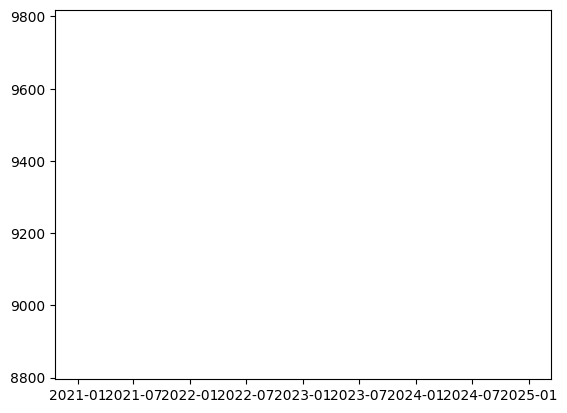

--------------------------
----------- READING: ../review_dataset/Entertainment/Netflix.csv
Failed to read: ../review_dataset/Entertainment/Netflix.csv
----------- READING: ../review_dataset/Entertainment/ticketmaster-buy-sell-tickets.csv
Rows with null values in any col: 1
TOTAL REVIWS: 9999
UNIQUE REVIEWS: 9951
MAX DATE: 2023-11-12 02:04:45
MIN DATE: 2017-09-15 14:14:09
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    277      277    277
2018-01-01   1730     1730   1730
2019-01-01   2327     2327   2327
2020-01-01    656      656    656
2021-01-01   1467     1467   1467
2022-01-01   1873     1873   1873
2023-01-01   1621     1621   1621


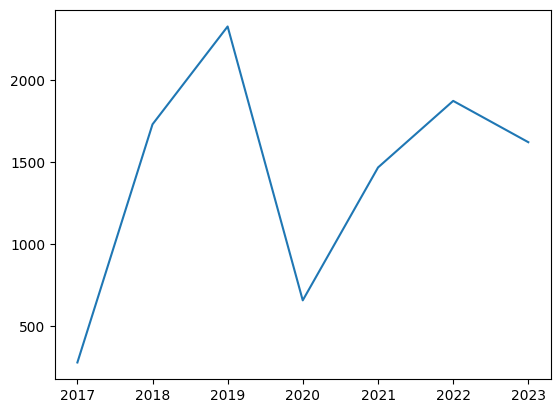

--------------------------
----------- READING: ../review_dataset/Finance/cash-app.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:56:20
MIN DATE: 2017-09-13 20:59:01
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    150      150    150
2018-01-01   1204     1204   1204
2019-01-01   1518     1518   1518
2020-01-01   2038     2038   2038
2021-01-01   1812     1812   1812
2022-01-01   1696     1696   1696
2023-01-01   1582     1582   1582


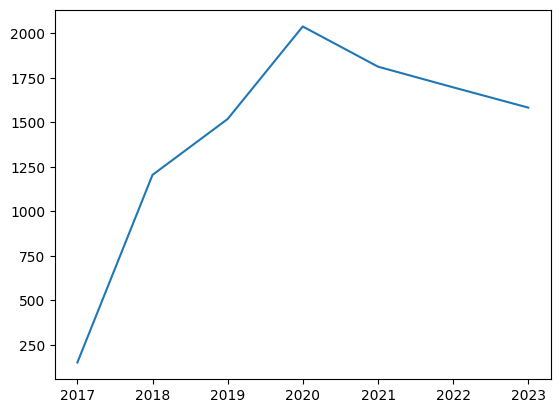

--------------------------
----------- READING: ../review_dataset/Finance/paypal-send-shop-manage.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 20:16:03
MIN DATE: 2017-08-25 13:18:09
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    243      243    243
2018-01-01    903      903    903
2019-01-01   1273     1273   1273
2020-01-01   2194     2194   2194
2021-01-01   2036     2036   2036
2022-01-01   1906     1906   1906
2023-01-01   1445     1445   1445


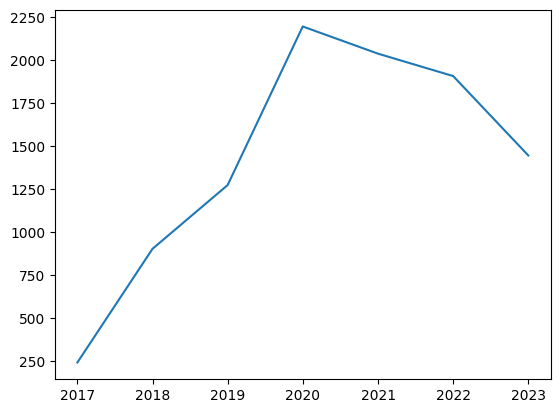

--------------------------
----------- READING: ../review_dataset/Finance/venmo.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 15:38:53
MIN DATE: 2017-09-16 05:00:51
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    156      156    156
2018-01-01   1039     1039   1039
2019-01-01   1512     1512   1512
2020-01-01   1752     1752   1752
2021-01-01   2168     2168   2168
2022-01-01   2114     2114   2114
2023-01-01   1259     1259   1259


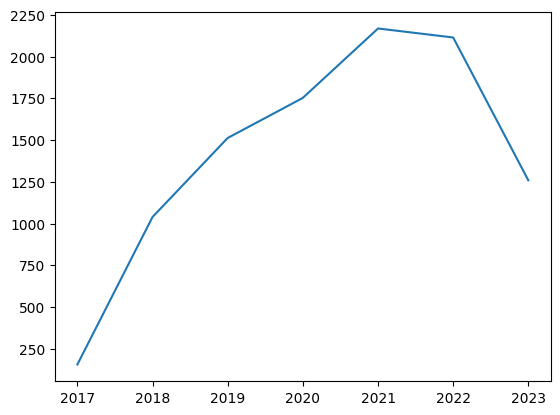

--------------------------
----------- READING: ../review_dataset/Games/among-us.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 19:58:40
MIN DATE: 2018-10-30 14:51:06
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2018-01-01      4        4      4
2019-01-01     49       49     49
2020-01-01   4248     4248   4248
2021-01-01   4348     4348   4348
2022-01-01    883      883    883
2023-01-01    468      468    468


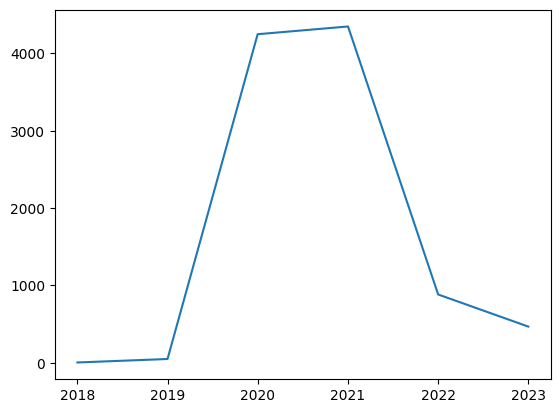

--------------------------
----------- READING: ../review_dataset/Games/clash-of-clans.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9920
MAX DATE: 2023-11-12 02:50:44
MIN DATE: 2017-08-02 14:27:40
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    650      650    650
2018-01-01   1272     1272   1272
2019-01-01   1938     1938   1938
2020-01-01   2030     2030   2030
2021-01-01   1517     1517   1517
2022-01-01   1438     1438   1438
2023-01-01   1075     1075   1075


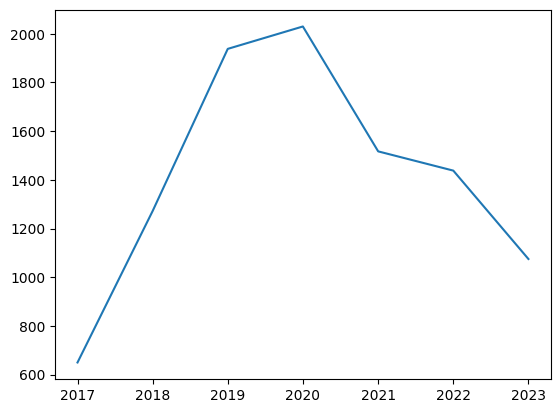

--------------------------
----------- READING: ../review_dataset/Games/monopoly-go.csv
Rows with null values in any col: 1
TOTAL REVIWS: 9999
UNIQUE REVIEWS: 9913
MAX DATE: 2023-11-12 02:44:04
MIN DATE: 2023-04-12 04:43:59
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2023-01-01   9913     9913   9913


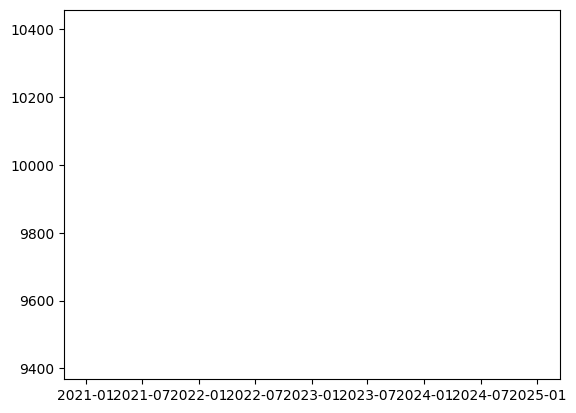

--------------------------
----------- READING: ../review_dataset/Health/bettersleep-relax-and-sleep.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10080
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-12 03:13:50
MIN DATE: 2017-06-06 06:37:19
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01   1135     1135   1135
2018-01-01   4746     4746   4746
2019-01-01    520      520    520
2020-01-01    452      452    452
2021-01-01    789      789    789
2022-01-01   1232     1232   1232
2023-01-01   1126     1126   1126


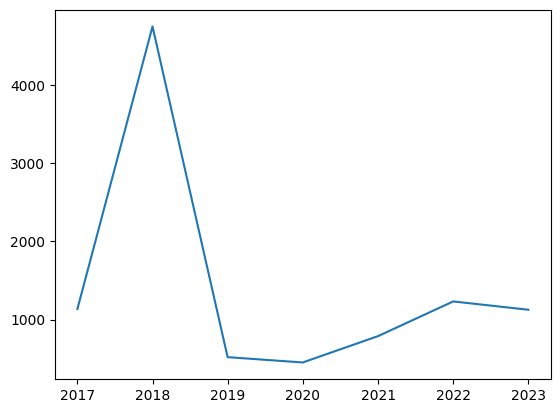

--------------------------
----------- READING: ../review_dataset/Health/planet-fitness-workouts.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10014
UNIQUE REVIEWS: 3833
MAX DATE: 2023-11-12 02:16:43
MIN DATE: 2010-11-04 09:59:47
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2010-01-01     15       15     15
2011-01-01     85       85     85
2012-01-01     52       52     52
2013-01-01     74       74     74
2014-01-01    104      104    104
2015-01-01    203      203    203
2016-01-01    155      155    155
2017-01-01    147      147    147
2018-01-01    309      309    309
2019-01-01    901      901    901
2020-01-01    318      318    318
2021-01-01    327      327    327
2022-01-01    634      634    634
2023-01-01    509      509    509


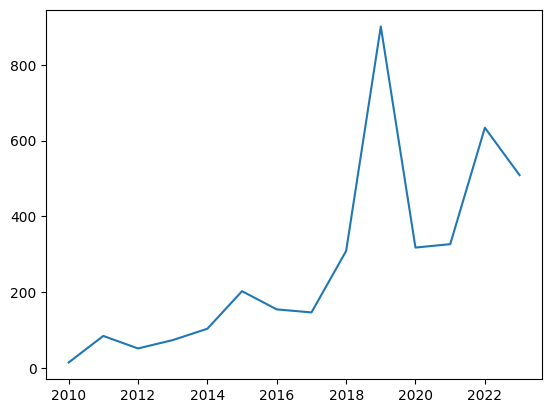

--------------------------
----------- READING: ../review_dataset/Health/yuka-foo-cosmetic-scanner.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 2098
MAX DATE: 2023-11-12 02:08:33
MIN DATE: 2019-03-27 20:37:44
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2019-01-01      2        2      2
2020-01-01     29       29     29
2021-01-01    102      102    102
2022-01-01    939      939    939
2023-01-01   1026     1026   1026


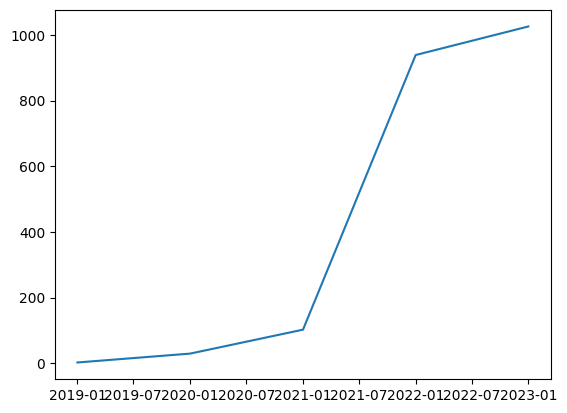

--------------------------
----------- READING: ../review_dataset/Shopping/Amazon-shopping.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10040
UNIQUE REVIEWS: 9559
MAX DATE: 2023-11-12 00:18:42
MIN DATE: 2017-09-07 10:53:53
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    285      285    285
2018-01-01    710      710    710
2019-01-01   1006     1006   1006
2020-01-01   1518     1518   1518
2021-01-01   2817     2817   2817
2022-01-01   1767     1767   1767
2023-01-01   1456     1456   1456


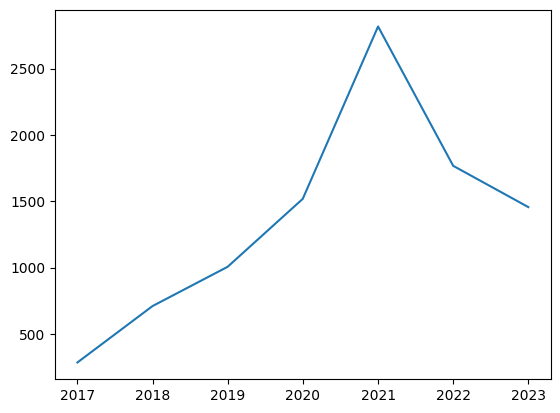

--------------------------
----------- READING: ../review_dataset/Shopping/etsy-home-style-gifts.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:28:18
MIN DATE: 2017-09-11 21:23:45
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01     72       72     72
2018-01-01    203      203    203
2019-01-01    554      554    554
2020-01-01   1672     1672   1672
2021-01-01   2176     2176   2176
2022-01-01   2602     2602   2602
2023-01-01   2721     2721   2721


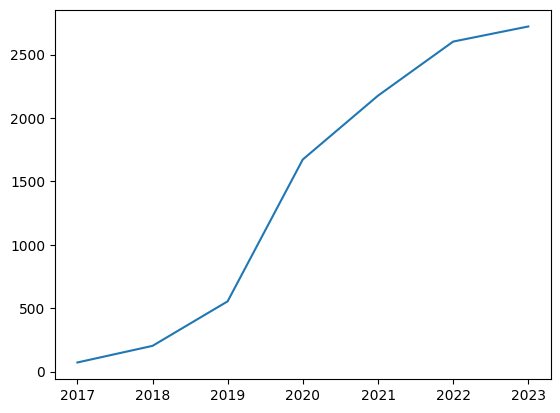

--------------------------
----------- READING: ../review_dataset/Shopping/walmart-shoping-savings.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 10000
MAX DATE: 2023-11-11 23:42:53
MIN DATE: 2017-09-12 03:54:52
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01     49       49     49
2018-01-01    597      597    597
2019-01-01    229      229    229
2020-01-01    875      875    875
2021-01-01   4111     4111   4111
2022-01-01   2212     2212   2212
2023-01-01   1927     1927   1927


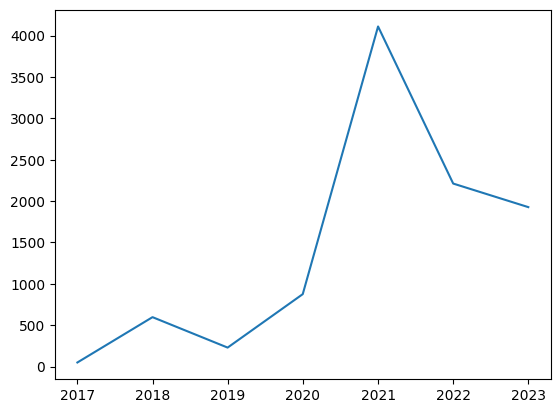

--------------------------
----------- READING: ../review_dataset/Social_Media/facebook.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9898
MAX DATE: 2023-11-11 16:06:27
MIN DATE: 2017-09-18 00:11:58
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    299      299    299
2018-01-01   1157     1157   1157
2019-01-01   1039     1039   1039
2020-01-01   1708     1708   1708
2021-01-01   2477     2477   2477
2022-01-01   1389     1389   1389
2023-01-01   1829     1829   1829


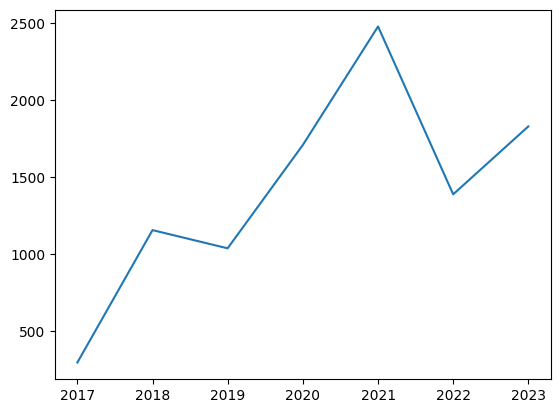

--------------------------
----------- READING: ../review_dataset/Social_Media/tiktok.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10000
UNIQUE REVIEWS: 9995
MAX DATE: 2023-11-12 02:03:06
MIN DATE: 2018-05-17 21:23:50
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2018-01-01    427      427    427
2019-01-01   1124     1124   1124
2020-01-01   2852     2852   2852
2021-01-01   1768     1768   1768
2022-01-01   1830     1830   1830
2023-01-01   1994     1994   1994


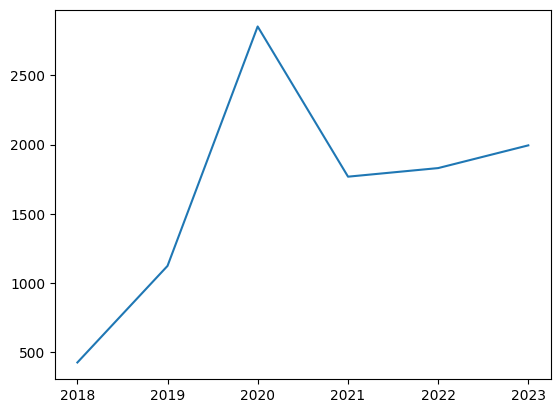

--------------------------
----------- READING: ../review_dataset/Social_Media/whatsapp-messenger.csv
Rows with null values in any col: 0
TOTAL REVIWS: 10040
UNIQUE REVIEWS: 7902
MAX DATE: 2023-11-12 03:02:56
MIN DATE: 2017-09-04 20:57:02
UPDATED DATATYPES:
Score               int64
Date       datetime64[ns]
Content            object
Title              object
dtype: object
            Score  Content  Title
Date                             
2017-01-01    380      380    380
2018-01-01   1297     1297   1297
2019-01-01   1281     1281   1281
2020-01-01   1155     1155   1155
2021-01-01   1180     1180   1180
2022-01-01   1097     1097   1097
2023-01-01   1512     1512   1512


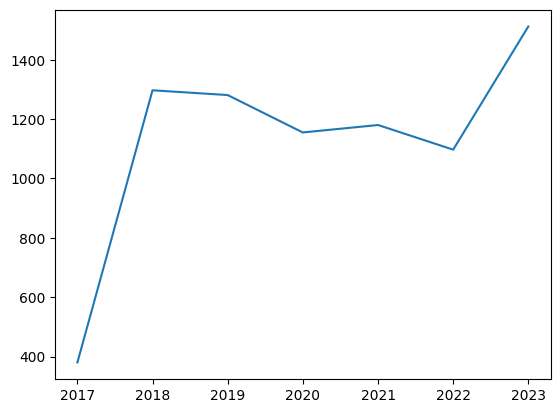

--------------------------


In [120]:
for data_set in set_paths:
    print("----------- READING:", data_set)
    try:
        this_set = pd.read_csv(data_set)
    except:
        print("Failed to read:", data_set)
        continue
    
    this_set = clean_dataset(this_set)
    
    df_year = this_set.copy()
    df_year['Date'] = pd.to_datetime(df_year["Date"].dt.strftime('%Y'))
    df_year = (df_year.groupby(['Date'])).count()
    print(df_year)
    x =  list(df_year.index)
    y = list(df_year['Content'])

    plt.plot(x, y)  # Plot the chart 
    plt.show()  # display 
    print("--------------------------")

#### Exploring current data set only now

In [121]:
df_year = current_set.copy()
df_year['Date'] = pd.to_datetime(df_year["Date"].dt.strftime('%Y'))
df_year = (df_year.groupby(['Date'])).count()
print(df_year)

            Score  Content  Title
Date                             
2018-01-01      4        4      4
2019-01-01     49       49     49
2020-01-01   4248     4248   4248
2021-01-01   4348     4348   4348
2022-01-01    883      883    883
2023-01-01    468      468    468


#### Total reviews per year

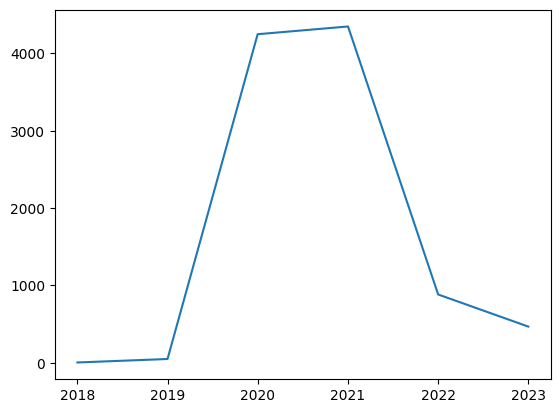

In [122]:

x =  list(df_year.index)
y = list(df_year['Content'])
  
plt.plot(x, y)  # Plot the chart 
plt.show()  # display 